### Predicting heart disease using machine learning 

This notebook looks into using various Pyhton-based machine learning and data sciencce libraries in an atempt tp buils machine learning model capabale of predicitng whether or not someone has heart disease based on  theor medical attrivutes.

### 1.Problem defination

GIven clincal parameter about a patient, can we predict whether or not they have heart disease or not?


### 2. Data

the orginal data came from the cleveland  data from UC machine learning Repository 


### 3. Evaluation 


if we can reach 95% accuracy at preicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.


### 4. Features

features which we can use in our data for our model 



### 5. Preparing the tools 

We're going to use pandas, matplolib and numpy for data analysis and manipulation 


In [148]:
### import all the tools we need 


# Regurla EDA (exploratory data analysis) and plotting libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# models from scikitlearn 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 


# model evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay,roc_curve

from sklearn.metrics import RocCurveDisplay


svc_disp = plot_roc_curve(svc, X_test, y_test)
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=svc_disp.ax_)

from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=svc_disp.ax_)

### Load data `

In [3]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data exploration (exploratory data analysis or EDA)

the goal here is to find out and bevome a subjevt matter export on the matter 


* what question are u trying to solve/
*  what kind of data do we have and how do we treat different types?
* what are msiing from the data and how do you deal with it?
* where are the outliers and why should you care about them?
* how can you add, change or remove features to get more out of your dta?


In [5]:
# lets find out how manyy class are present in our target clumn 
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

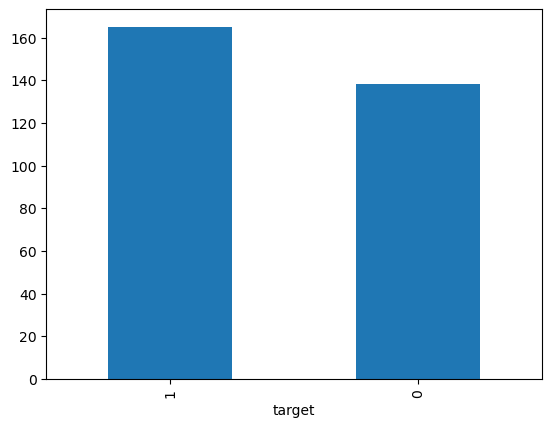

In [7]:
df["target"].value_counts().plot(kind='bar');

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
## chek missing values 

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
# compare taregt column with sex xolumn 
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


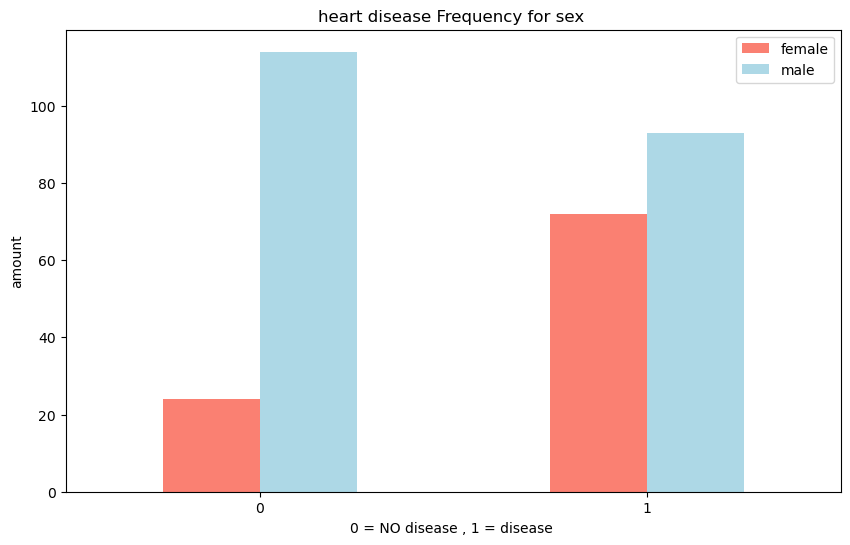

In [15]:
pd.crosstab(df.target,df.sex).plot( kind='bar',
                                    figsize = (10,6),
                                   color = ["salmon","lightblue"])
plt.title("heart disease Frequency for sex ")
plt.xlabel("0 = NO disease , 1 = disease ")
plt.ylabel("amount")
plt.legend(["female","male"])
plt.xticks(rotation= 0);

In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


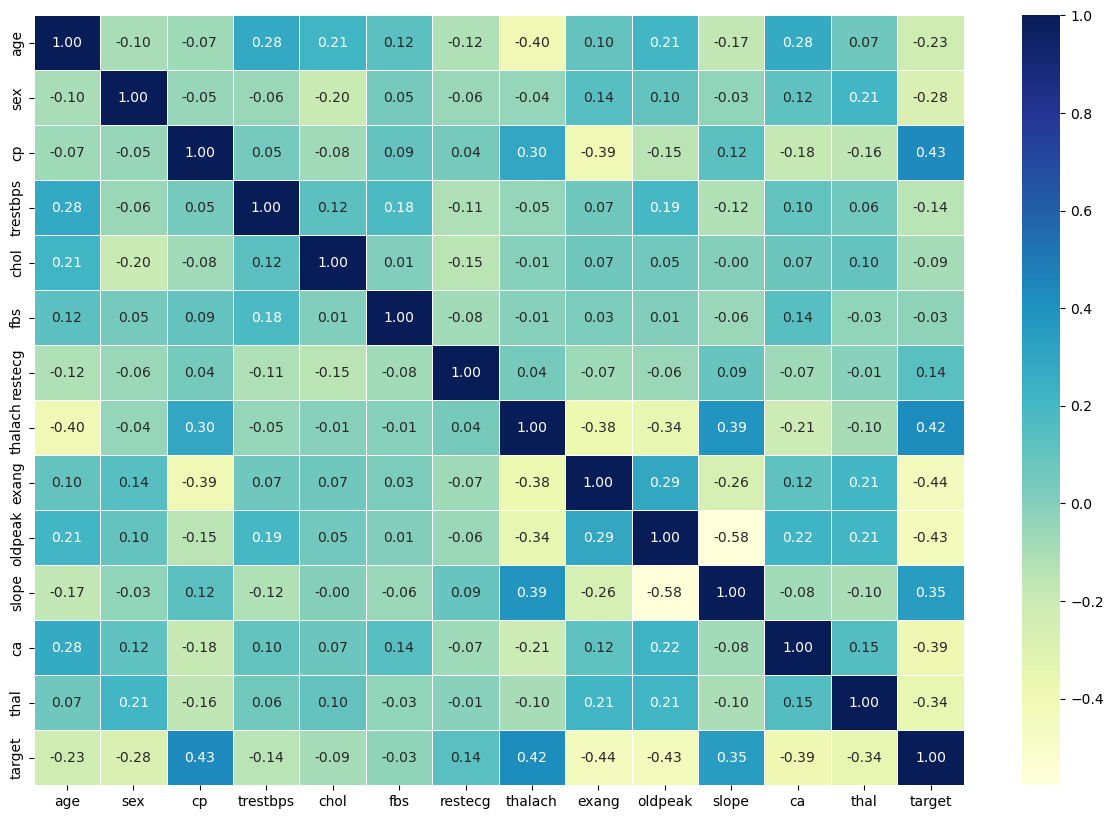

In [19]:

# lets make our coorelation matriix a little prettier 
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                linewidths=0.5,
                fmt ='.2f',
                cmap="YlGnBu")



### Model 

In [21]:
## split the data 

X = df.drop("target",axis = 1)
y= df["target"]

In [23]:
## spli the data into traininng and testing 
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

 we are going to try 3 diffferent machine learning models  
* Logsitic Regresion 
* K-nearser Neighbors Classifer 
* Random Forest Clasifier 

In [41]:
# put the models inn the dictionary 
models = {"Logestic Regression ": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# create a function  to fit and score models 
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores = {}
    # loop the models 
    for name,model in models.items():
        # fit the model through the data 
        model.fit(X_train,y_train)
        # evaluate the model  and appened its score to model scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores
        
        
    
    

In [43]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\rithi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logestic Regression ': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### model COmparison

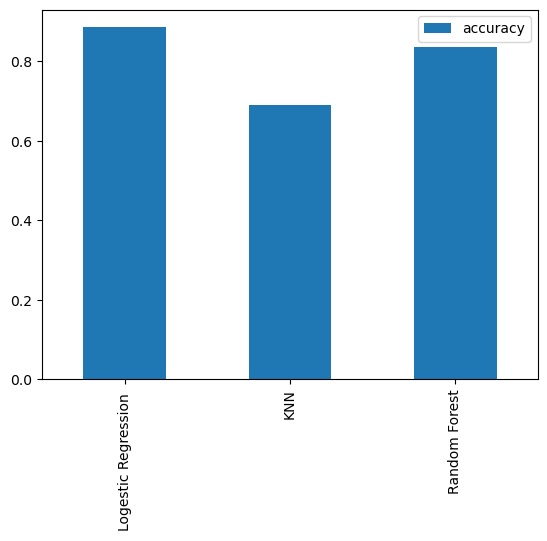

In [48]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

lets look at the following and tune  it 
* Hyperparameter tuning 
* Feature importance
* Confusion Matrix
* Cross-validation
* Presicion
* Recall
* f1-score 
* Classificaiton Report 
* ROC cureve 
* Area under the curve (AUC)

In [58]:
## lets tune KNN
train_scores = []
test_score= []


# create a list of differenet values for n-neighbours
neighbours = range(1,21)

# setup KNN
knn = KNeighborsClassifier()

for n in neighbours:
    knn.set_params(n_neighbors=n)

    # fit the algorithm
    knn.fit(X_train,y_train)

    # update the train score 
    train_scores.append(knn.score(X_train,y_train))

    # update the test score
    test_score.append(knn.score(X_test,y_test))

    

In [60]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [62]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

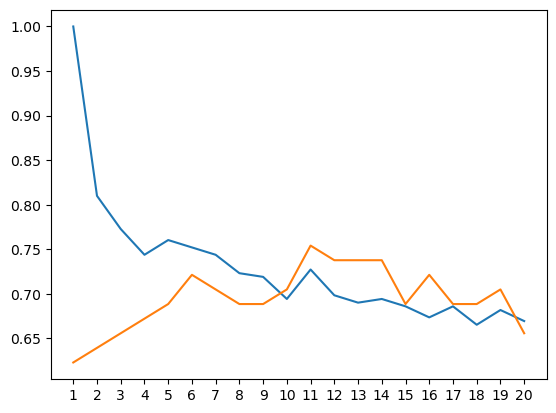

Macimum KNN score on the test Data: 75.41%


In [76]:
plt.plot(neighbours,train_scores,label="Train Scores")
plt.plot(neighbours,test_score,label="Test Scores")
plt.xticks(np.arange(1,21,1))
plt.show()
print(f"Macimum KNN score on the test Data: {max(test_score)*100:.2f}%")

### Hyperparameter tuning with RandomSearchCV

In [99]:
# create a hyper parameter grid for logistic regresionn
log_reg_grid ={ "C": np.logspace(-4,4,20),
               "solver":["liblinear"]}

# create a grid for randomforrestclassifier 
rf_grid = {"n_estimators" : np.arange(10,1000,50),
           "max_depth": [None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)
          }

now we've got hyperparameter grids setups for each of our models, ;ets tune  them using 
RandomizedSearchCV

In [95]:
# tune LOgistiREgression 
np.random.seed(42)

#setup random hyper parameter search for LogitsticRegression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)
# fit  random hyperparameter search  model for logistic regresion 
rs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [84]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [86]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we tunes logistic regression,now lets od for random forrest classifier  


In [101]:
np.random.seed(42)

# setup random hyperparameter search for RandomForrestClasifier 
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter = 20,
                           verbose = True
)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [103]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [105]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [114]:
log_reg_grid ={ "C": np.logspace(-4,4,30),
               "solver":["liblinear"]}

# tune LogistiRegression 
np.random.seed(42)

#setup grid hyper parameter search for LogitsticRegression 
gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid=log_reg_grid,
                               cv = 5,
                               verbose = True)
# fit grid hyperparameter search  model for logistic regresion 
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [156]:
# evaluate  the score 
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy 
* ROC Cureve and AUC score 
* Confusion Matrix
* Classificaiton report 
* Precision
* Recall 
* F1-score 


and it would be great if cross-validation was used where possible.

to make compariion and evaluate our trained model,first we need to make predciitns s


In [173]:
# maek prediciton with tuned model 
y_preds = gs_log_reg.predict(X_test)

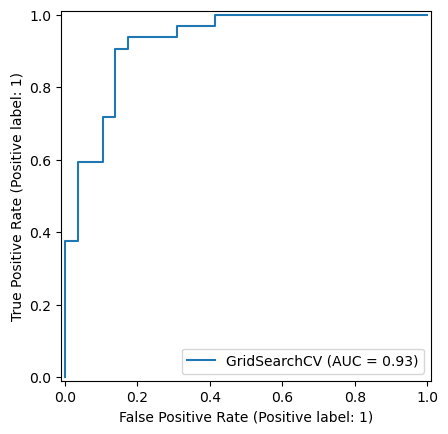

In [175]:
# plot ROC curve and calculate and calculate Auc metrics
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test); 

In [164]:
# confusion matricx 
#print(confusion_matrix (y_test,y_preds))

In [177]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Feature Importance 
Feature importance is another as asking " which feature is leads to outcomes of the model meaning leasing to eart disease or not "

finding feature importance is different for each machine learning model.
model. 



In [186]:
# fit an instance of logistic regressin
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418,
                         solver = "liblinear")

clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [188]:
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [192]:
# match coefs of features to  columns 

feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

<Axes: title={'center': 'Feature Importancce'}>

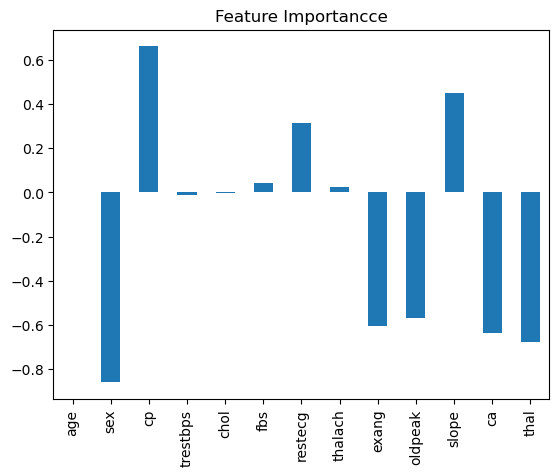

In [194]:
# visulaie the features

feature_df = pd.DataFrame(feature_dict,index = [0])
feature_df.T.plot.bar(title="Feature Importancce",legend = False)